In [1]:
import numpy as np
import sklearn
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from matplotlib import rc
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import MaxNLocator
import scipy.signal
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


/home/naireen/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
dataset = pd.read_csv("../../csvs/BetaFeats/sifOrbsMore=10000.0Nout=100window=10.csv", index_col = 0)
print dataset.columns.values

['runstring' 't_final_short' 'Rel_Eerr_short' 'avg_beta12' 'std_beta12'
 'min_beta12' 'max_beta12' 'avg_beta23' 'std_beta23' 'min_beta23'
 'max_beta23' 'avg_a1' 'std_a1' 'max_a1' 'min_a1' 'norm_std_a1'
 'norm_max_a1' 'norm_std_window10_a1' 'norm_max_window10_a1' 'avg_e1'
 'std_e1' 'max_e1' 'min_e1' 'norm_std_e1' 'norm_max_e1'
 'norm_std_window10_e1' 'norm_max_window10_e1' 'avg_inc1' 'std_inc1'
 'max_inc1' 'min_inc1' 'norm_std_inc1' 'norm_max_inc1'
 'norm_std_window10_inc1' 'norm_max_window10_inc1' 'avg_eH1' 'std_eH1'
 'max_eH1' 'min_eH1' 'avg_iH1' 'std_iH1' 'max_iH1' 'min_iH1' 'avg_ecross1'
 'std_ecross1' 'max_ecross1' 'min_ecross1' 'norm_a1_slope' 'avg_a2'
 'std_a2' 'max_a2' 'min_a2' 'norm_std_a2' 'norm_max_a2'
 'norm_std_window10_a2' 'norm_max_window10_a2' 'avg_e2' 'std_e2' 'max_e2'
 'min_e2' 'norm_std_e2' 'norm_max_e2' 'norm_std_window10_e2'
 'norm_max_window10_e2' 'avg_inc2' 'std_inc2' 'max_inc2' 'min_inc2'
 'norm_std_inc2' 'norm_max_inc2' 'norm_std_window10_inc2'
 'norm_max_window

In [4]:
features = []
features += ['avg_iH1', 'avg_iH2']
features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
features += ['avg_beta12','std_beta12','min_beta12','max_beta12','avg_beta23','std_beta23','min_beta23','max_beta23'] 
y = dataset['Stable']
X = dataset[features]
X.head()

,avg_iH1,avg_iH2,norm_std_a1,norm_max_a1,norm_std_window10_a1,norm_max_window10_a1,norm_std_a2,norm_max_a2,norm_std_window10_a2,norm_max_window10_a2,...,norm_a2_slope,norm_a3_slope,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,max_beta23
0,0.396282,0.481704,0.000329,0.001083,0.000214,0.000456,0.000701,0.001978,0.000446,0.000964,...,2.144832e-10,2.681898e-11,8.488064,0.048209,8.344623,8.551727,15.791595,0.085995,15.576612,16.019985
1,1.034575,0.823935,0.000739,0.002137,0.000202,0.000463,0.000200,0.000350,0.000226,0.000377,...,3.559377e-11,-9.314702e-11,8.414875,0.039142,8.308582,8.495900,15.314101,0.037065,15.254833,15.368196
2,0.440470,0.491261,0.001951,0.003550,0.001735,0.002860,0.002303,0.004034,0.002080,0.003409,...,-3.330088e-11,-4.095504e-11,3.566625,0.132349,3.331239,3.773868,25.113282,0.137779,24.898424,25.351948
3,0.432098,0.550624,0.000026,0.000120,0.000005,0.000009,0.000019,0.000050,0.000016,0.000041,...,7.816527e-13,-7.257099e-12,18.513867,0.003597,18.498104,18.521611,19.142029,0.008997,19.120348,19.156777
4,5.722053,17.442426,0.028284,0.063028,0.004313,0.010716,0.038832,0.160685,0.090892,0.112168,...,3.913858e-08,-2.610208e-08,23.314674,6.756316,3.957209,38.942908,-19.036068,5.544896,-21.930247,4.156005


In [9]:
Nrows = int(0.8*X.shape[0])
trainX = X.iloc[:Nrows, :]
trainY = y.iloc[:Nrows]
testX = X.iloc[Nrows:, :]
testY = y.iloc[Nrows:]
xgbc = XGBClassifier(seed = 0)

In [8]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [16]:
space ={
        'max_depth': hp.randint('x_max_depth',  20),
        'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
        'subsample': hp.uniform ('x_subsample', 0.8, 1),
        'scale_pos_weight': hp.uniform("x_pos_weight", 1, 15),
        "learning_rate":hp.uniform("x_learning_rate",0.01,0.2),
        'colsample_bytree': hp.uniform ('x_tree_colsample', 0.5,1),
}

dtrain = xgb.DMatrix(trainX, trainY)
dtest = xgb.DMatrix(testX, testY)
def objective(space):

    clf = XGBClassifier(n_estimators = 100, 
                            max_depth = space['max_depth'], 
                            min_child_weight =space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree =space['colsample_bytree'],
                            learning_rate = space['learning_rate'], seed = 0)
    
    params = clf.get_xgb_params()
    score = xgb.cv(params, dtest, nfold = 5, metrics = "auc", early_stopping_rounds=10)
    #print score
    #score = cross_val_score(clf, trainX, trainY, cv = 5, scoring="average_precision")
    avg_score =  np.mean(score["test-auc-mean"])
    error = np.mean(score["test-auc-std"])
    
    bst = xgb.train(params, dtrain)
    preds = bst.predict(dtest)
    test_score = metrics.roc_auc_score(testY, preds)
    
    print "SCORE:", avg_score, "ERROR", error, "HOLDOUT SCORE", test_score

    return{'loss':1-test_score, 'status': STATUS_OK, "cv_score":avg_score , "cv_error":error, "holdout":test_score }

In [17]:
trials = Trials()
import time
start = time.time()
best = fmin(fn=objective, space = space, algo = tpe.suggest, max_evals = 50, trials = trials)
end = time.time()
print("Optimization Time: %f seconds", (end  -start))

SCORE: 0.97280504 ERROR 0.00362785063322 HOLDOUT SCORE 0.980295370054
SCORE: 0.95556264 ERROR 0.00604584298846 HOLDOUT SCORE 0.966202885068
SCORE: 0.97109546 ERROR 0.00264882096975 HOLDOUT SCORE 0.980646071515
SCORE: 0.97114524 ERROR 0.00217561255556 HOLDOUT SCORE 0.977473002438
SCORE: 0.9719926 ERROR 0.00317156439297 HOLDOUT SCORE 0.97852787155
SCORE: 0.5 ERROR 0.0 HOLDOUT SCORE 0.5
SCORE: 0.9721471 ERROR 0.00279388139557 HOLDOUT SCORE 0.980457818724
SCORE: 0.9695086 ERROR 0.00391472160892 HOLDOUT SCORE 0.979064731313
SCORE: 0.92198232 ERROR 0.0134045106806 HOLDOUT SCORE 0.942333235423
SCORE: 0.97244172 ERROR 0.00296630595751 HOLDOUT SCORE 0.980628645356
SCORE: 0.97233324 ERROR 0.00213593651055 HOLDOUT SCORE 0.981047543423
SCORE: 0.96976066 ERROR 0.00244294016622 HOLDOUT SCORE 0.979000975027
SCORE: 0.97287732 ERROR 0.00311374568934 HOLDOUT SCORE 0.981341944984
SCORE: 0.97069592 ERROR 0.00342897029766 HOLDOUT SCORE 0.978828640362
SCORE: 0.96914718 ERROR 0.00349501114256 HOLDOUT SCORE 0

In [18]:
#fit the smaller rage 
#{'x_learning_rate': 0.07419653015127085,
# 'x_max_depth': 8,
# 'x_min_child': 4.0,
# 'x_pos_weight': 8.889472764333366,
# 'x_subsample': 0.9380315392096068,
# 'x_tree_colsample': 0.734517699234413}
best

{'x_learning_rate': 0.19890696372714528,
 'x_max_depth': 17,
 'x_min_child': 8.0,
 'x_pos_weight': 12.505309968632893,
 'x_subsample': 0.9409498631912948,
 'x_tree_colsample': 0.7528946858805113}

In [20]:
#switch to the traditional 80 20 slipt, dont know why i did the 40 60 split before
Nrows = int(0.8*X.shape[0])
trainX = X.iloc[:Nrows, :]
trainY = y.iloc[:Nrows]
testX = X.iloc[Nrows:, :]
testY = y.iloc[Nrows:]



best_xgbc = XGBClassifier(n_estimators=100, scale_pos_weight=best["x_pos_weight"],
                         learning_rate = best["x_learning_rate"], 
                         max_depth = int(best["x_max_depth"]), 
                         min_child_weight = best["x_min_child"],
                         subsample = best["x_subsample"], 
                         colsample_bytree = best["x_tree_colsample"])
params = best_xgbc.get_xgb_params()
#score = xgb.cv(params, dtrain, nfold = 5, metrics = "auc", verbose_eval=True)
#print score
d_Train = xgb.DMatrix(trainX, trainY)
d_Test = xgb.DMatrix(testX)
bst = xgb.train(params, d_Train)
preds = bst.predict(d_Test)
score = metrics.average_precision_score(testY, preds)
print score

0.969305937233


In [21]:
print best

{'x_pos_weight': 12.505309968632893, 'x_learning_rate': 0.19890696372714528, 'x_max_depth': 17, 'x_min_child': 8.0, 'x_tree_colsample': 0.7528946858805113, 'x_subsample': 0.9409498631912948}


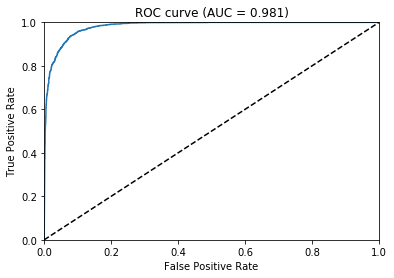

In [22]:
#the ROCAUC score is now 98.0 witht eh 2080 split compared to the 40 60 from before 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(testY, preds)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve (AUC = {0:.3f})'.format(metrics.roc_auc_score(testY, preds)))

In [23]:
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(testY, preds)
for i in range(0,len(recall), 10):
    print("Threshold {0}, recall = {1}, precision = {2}".format(thresholds[i], recall[i], precision[i]))



Threshold 0.067848816514, recall = 1.0, precision = 0.570890113076
Threshold 0.0686691477895, recall = 0.999492127984, precision = 0.572259377726
Threshold 0.0695178881288, recall = 0.999492127984, precision = 0.573928258968
Threshold 0.0701859593391, recall = 0.999492127984, precision = 0.575775307197
Threshold 0.0714560523629, recall = 0.999492127984, precision = 0.577464788732
Threshold 0.0722047388554, recall = 0.999492127984, precision = 0.579164214244
Threshold 0.0731065347791, recall = 0.999492127984, precision = 0.580873671783
Threshold 0.0739812552929, recall = 0.999492127984, precision = 0.582593250444
Threshold 0.0746115297079, recall = 0.999492127984, precision = 0.58432304038
Threshold 0.0750596746802, recall = 0.999492127984, precision = 0.587112171838
Threshold 0.075786024332, recall = 0.999492127984, precision = 0.589221556886
Threshold 0.0763995274901, recall = 0.999492127984, precision = 0.591168519075
Threshold 0.0771703869104, recall = 0.999492127984, precision = 0.

[ 0.93492424  0.93492424  0.28963953  0.93511927  0.93479049]
1969 3031
[ 1528.   242.   160.   121.    61.    62.    54.    40.    38.    29.
    20.    20.    28.    26.    17.    22.    16.    18.    21.    15.
    12.    11.    12.    11.    18.    12.    17.    13.    14.    15.
    10.    11.    18.    17.     8.     8.    11.    12.    19.    12.
    16.    15.    18.    17.    22.    24.    25.    31.    23.    41.]
[   0    1    1    0    0    1    2    3    2    2    2    1    1    1    3
    2    4    2    1    4    2    2    2    4    3    4    4    5    7    2
    2    3    6    8    4    7    8    8    7   10   18   20   18   28   28
   36   64   74  133 1406]


(0, 350)

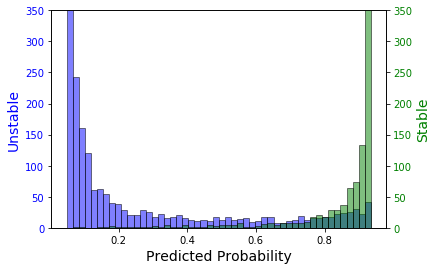

In [24]:
# Histogram:
bins = 50
Stable=preds[np.where(testY==1)]
print Stable[:5][:]
Unstable=preds[np.where(testY==0)]
print Stable.size, Unstable.size


fig, ax1 = plt.subplots()
n, bins, pathces = ax1.hist(Unstable, bins, alpha=0.5, label='No', color='blue', edgecolor = "black")
print n
ax1.set_xlabel('Predicted Probability', fontsize=14)
ax1.set_ylabel('Unstable',  fontsize=14, color='blue')
for tl in ax1.get_yticklabels():
    tl.set_color('blue')
    


ax2 = ax1.twinx()
n, bins , patches = ax2.hist(Stable, bins, alpha=0.5, label='Yes',color='green', edgecolor = "black")
print n.astype(int)
ax2.set_ylabel('Stable', fontsize=14, color='green')
for tl in ax2.get_yticklabels():
    tl.set_color('green')
    
    
#ax1.set_ylim(ax2.get_ylim())
ax1.set_ylim([0,350]) # goes up to ~4300
ax2.set_ylim([0,350]) # goes up to ~2100

In [25]:
gains = bst.get_score(importance_type='gain')
total_gains = np.sum(gains.values())
#print gains.keys()
#print gains.values()/total_gains*100.
#print np.sum(gains.values()/total_gains*100.)
a = {k: v / total_gains*100. for k, v in gains.iteritems()}

In [26]:
print a

{'norm_a1_slope': 0.97611038164275388, 'avg_iH2': 0.79760242478138688, 'avg_iH1': 0.80787570853163948, 'std_ecross3': 2.1869551665694495, 'norm_std_a3': 0.66908786677762322, 'norm_std_a2': 0.43957099421477619, 'norm_std_a1': 0.88441831313319696, 'max_beta23': 1.4321359545391008, 'std_beta12': 33.256554776790367, 'norm_std_window10_a1': 0.7187608467352502, 'norm_std_window10_a2': 0.62322454042953013, 'norm_std_window10_a3': 0.86414300019839363, 'avg_ecross3': 2.4697844600942789, 'avg_ecross2': 1.4733526520196181, 'avg_ecross1': 1.5953122791272021, 'avg_beta23': 0.78524026995665541, 'min_beta12': 1.1627994270480309, 'max_ecross1': 2.0245122132431908, 'max_ecross3': 1.9277089217245289, 'norm_max_a3': 0.89266974395685628, 'norm_a3_slope': 0.89816122168971058, 'norm_a2_slope': 1.3669854953447211, 'avg_beta12': 0.83324752297744553, 'norm_max_a1': 0.69960378349125363, 'norm_max_a2': 8.7139015472822514, 'std_beta23': 7.0485059971215627, 'max_beta12': 0.75704451496895209, 'max_ecross2': 15.0671

IGNORE THE REST, THIS IS FOR FURTHER OPTIMIZATION

#continue optimization from where we left off
#trials = Trials()
import time
start = time.time()
best = fmin(fn=objective, space = space, algo = tpe.suggest, max_evals = 200, trials = trials)
end = time.time()
print("Optimization Time: %f seconds", (end  -start))

best

#switch to the traditional 80 20 slipt, dont know why i did the 40 60 split before
Nrows = int(0.8*X.shape[0])
trainX = X.iloc[:Nrows, :]
trainY = y.iloc[:Nrows]
testX = X.iloc[Nrows:, :]
testY = y.iloc[Nrows:]



best_xgbc = XGBClassifier(n_estimators=100, scale_pos_weight=best["x_pos_weight"],
                         learning_rate = best["x_learning_rate"], 
                         max_depth = int(best["x_max_depth"]), 
                         min_child_weight = best["x_min_child"],
                         subsample = best["x_subsample"], 
                         colsample_bytree = best["x_tree_colsample"], seed = 0)
params = best_xgbc.get_xgb_params()
#score = xgb.cv(params, dtrain, nfold = 5, metrics = "auc", verbose_eval=True)
#print score
d_Train = xgb.DMatrix(trainX, trainY)
d_Test = xgb.DMatrix(testX)
bst = xgb.train(params, d_Train)
preds = bst.predict(d_Test)
score = metrics.average_precision_score(testY, preds)
print score

#the ROCAUC score is now 98.0 witht eh 2080 split compared to the 40 60 from before 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(testY, preds)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve (AUC = {0:.3f})'.format(metrics.roc_auc_score(testY, preds)))

#continue optimization from where we left off
#trials = Trials()
#import time
start = time.time()
best = fmin(fn=objective, space = space, algo = tpe.suggest, max_evals = 200, trials = trials)
end = time.time()
print("Optimization Time: %f seconds", (end  -start))

print len(trials.trials)
#for i in range(200)
complete_results = [x["result"]["cv_score"] for x in trials]
print np.max(complete_results)
#print trials.trials["result"]["cv_score"]

#continue optimization from where we left off
#trials = Trials()
#import time
start = time.time()
best = fmin(fn=objective, space = space, algo = tpe.suggest, max_evals = 240, trials = trials)
end = time.time()
print("Optimization Time: %f seconds", (end  -start))

best_xgbc = XGBClassifier(n_estimators=100, scale_pos_weight=best["x_pos_weight"],
                         learning_rate = best["x_learning_rate"], 
                         max_depth = int(best["x_max_depth"]), 
                         min_child_weight = best["x_min_child"],
                         subsample = best["x_subsample"], 
                         colsample_bytree = best["x_tree_colsample"], seed = 0)
params = best_xgbc.get_xgb_params()

bst = xgb.train(params, d_Train)
preds = bst.predict(d_Test)
score = metrics.average_precision_score(testY, preds)
print score
#the ROCAUC score is now 98.0 witht eh 2080 split compared to the 40 60 from before 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(testY, preds)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve (AUC = {0:.3f})'.format(metrics.roc_auc_score(testY, preds)))

print best